# Trainig a Model Using the MNIST datase for recgonise hand-writen digits
    On this notebook we show how to create a model using  MNIST dataset.
    We start showing how to read the bits from the dataset



  [http://yann.lecun.com/exdb/mnist/](http://yann.lecun.com/exdb/mnist/) 

# The Data

  We will start by undertandig how the data is formated and parsing it i a suuitable way for train our model.
  
  Mnist provide 4 files: 



## Little and Big Endian Architecture 

  There are 2 types of processors architecture(litle and big endian). In litle endian bits are store from left to righ This is basically how the bytes are stored, in litle they are stored from left to right and in big the other way around.(Look this is you want to know more about https://chortle.ccsu.edu/AssemblyTutorial/Chapter-15/ass15_3.html ).
  This is relevant for us because we need to know read the bytes right for get the proper data.
  In python we can easyle check using sys, since I am using a Intel processor i expected to be litle.

In [1]:
import numpy as np
from sys import byteorder

Now we can check  our architecture:

In [2]:
print(byteorder)

little


## Reading Mnist
    Now we can start reading the train images file. 
    For the tain images we espected (this data can be found in the Mnist website).
   

In [3]:
import gzip

with gzip.open('mnist/train-images-idx3-ubyte.gz', 'rb') as f:
    fc_train_img = f.read()

 The first 4 bytes is the magic number which is a 32 bit integer, for the image set this number is 2051. Note that we are setting the byteorder as big.

In [4]:
int.from_bytes(fc_train_img[0:4], byteorder='big')

2051

 Next is the the number of images as a 32 bit integer:

In [5]:
train_img_total = int.from_bytes(fc_train_img[4:8], byteorder='big')
train_img_total

60000

Then number of rows as 32 bit integer.

In [6]:
row = int.from_bytes(fc_train_img[8:12], byteorder='big')
row

28

And a columns as 32 bit integer.

In [7]:
col = int.from_bytes(fc_train_img[12:16], byteorder='big')
col

28

Then unsigned bytes(8 bits) , each byte represent a pixel. They are orginezed row-wise.

The total of bits is : 
```python
train_img_total*row*col
```





In [8]:
last_byte = (train_img_total*row*col) + 16
last_byte

47040016

Now whe can read all bits:

In [9]:
x_train = list(fc_train_img[16:last_byte])

And reshape them ass 28*27 (784) array. They represent our vector.

Also in Mnist pixel values are 0 to 255.0 , 0 representing the background. We want ot invert this, because having a non zero value as background is better for the trainig. 

In [10]:
x_train = ~np.array(x_train).reshape(train_img_total,row*col).astype(np.uint8)
x_train.shape

(60000, 784)

We can see one image using pyplot:

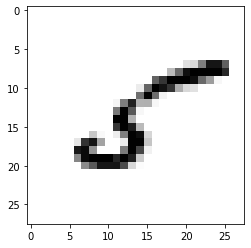

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.imshow(x_train[11].reshape(row,col), cmap='gray')

Thats look like the image 11 is a 5. We can now read labels and check.

In [12]:
with gzip.open('mnist/train-labels-idx1-ubyte.gz', 'rb') as f:
    fc_train_lbl = f.read()

First 32 bits are magin number : 2049

In [13]:
int.from_bytes(fc_train_lbl[0:4], byteorder='big')


2049

Then a 32 bits intiger, the total of labels. Must be 6000 as we got 6000 images. 

In [14]:
train_lvl_total = int.from_bytes(fc_train_lbl[4:8], byteorder='big')
train_lvl_total

60000

Now each unsigned byte is a label, so we can check that 11 is 5:

In [16]:
y_train = np.array(list(fc_train_lbl[8:train_lvl_total+8]))
print(y_train[11])

5


We now real the test images and labels:

In [17]:
with gzip.open('mnist/t10k-images-idx3-ubyte.gz', 'rb') as f:
    fc_test_img = f.read()
with gzip.open('mnist/t10k-labels-idx1-ubyte.gz', 'rb') as f:
    fc_test_lbl = f.read()
    
test_img_total = int.from_bytes(fc_test_img[4:8], byteorder='big')
test_lbl_total = int.from_bytes(fc_test_lbl[4:8], byteorder='big')

last_byte = (test_img_total*row*col) + 16
x_test = list(fc_test_img[16:last_byte])
x_test = ~np.array(x_test).reshape(test_img_total,row*col).astype(np.uint8)

y_test = np.array(list(fc_test_lbl[8:test_lbl_total+8]))

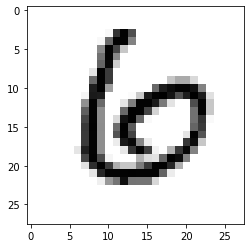

In [18]:
plt.imshow(x_test[11].reshape(row,col), cmap='gray')

In [19]:
print(y_test[11])

6


In [20]:
import keras as kr

Using TensorFlow backend.


In [21]:
model = kr.models.Sequential()

In [22]:
model.add(kr.layers.Dense(units=10, input_dim=784, activation='softmax'))

In [23]:
model.compile(loss='categorical_crossentropy',optimizer='adam', metrics=['accuracy'])

## Activation : softmax
  We want our result to represent a probablility of being one of the 10 digits(0,1,3...).
  The softmax activation function will do this for us, it will output our output for each neuron beetwen 0 and 1.Then each 
  of our neuron can represent a a digit so the one will bigger probability will be our prediction.
  
  $$\sigma (z)_j = \frac{e^{(z)_j}}{\sum_{k=0}^{K}e^{(z)_k}} \text{  where   j = 1,...,K}$$  
  
  In our case K = 10.
  
  https://www.analyticsvidhya.com/blog/2017/10/fundamentals-deep-learning-activation-functions-when-to-use-them/



In [24]:
test = np.arange(0.0, 784, 1).reshape(1,784)
result = model.predict(test)
result


array([[4.791266e-04, 0.000000e+00, 9.995209e-01, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00]], dtype=float32)

In [25]:
sum = 0 
for i in result[0]:
    sum += i
sum

1.0000000244763214

## Loss : categorical_crossentropy

    After we calculate our result we need to calculate the distance beetween our prediction and our epected result.
    https://algorithmia.com/blog/introduction-to-loss-functions
    

## Optimazer : adam
https://algorithmia.com/blog/introduction-to-optimizers

In [26]:
y_train = kr.utils.to_categorical(y_train, 10)
y_test  = kr.utils.to_categorical(y_test, 10)

In [27]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [29]:
x_train =  x_train/255.0
y_test = y_test/255.0

In [33]:
epoch = 10
history_callback = model.fit(x_train, y_train, validation_data=(x_test,y_test), epochs=epoch, batch_size=100)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 1s 25us/step - loss: 0.7976 - accuracy: 0.7894 - val_loss: 0.1663 - val_accuracy: 0.8682
Epoch 2/10
60000/60000 [==============================] - 1s 23us/step - loss: 0.4282 - accuracy: 0.8796 - val_loss: 0.1603 - val_accuracy: 0.8936
Epoch 3/10
60000/60000 [==============================] - 1s 24us/step - loss: 0.3773 - accuracy: 0.8913 - val_loss: 0.1666 - val_accuracy: 0.8986
Epoch 4/10
60000/60000 [==============================] - 1s 24us/step - loss: 0.3538 - accuracy: 0.8978 - val_loss: 0.1542 - val_accuracy: 0.9085
Epoch 5/10
60000/60000 [==============================] - 1s 24us/step - loss: 0.3380 - accuracy: 0.9015 - val_loss: 0.1659 - val_accuracy: 0.9080
Epoch 6/10
60000/60000 [==============================] - 1s 23us/step - loss: 0.3299 - accuracy: 0.9043 - val_loss: 0.1575 - val_accuracy: 0.9123
Epoch 7/10
60000/60000 [==============================] - 1s 23us/st

In [34]:
val_accuracy = np.array(history_callback.history['val_accuracy'])
val_loss =  np.array(history_callback.history['val_loss'])
accuracy =  np.array(history_callback.history['accuracy'])
loss =  np.array(history_callback.history['loss'])

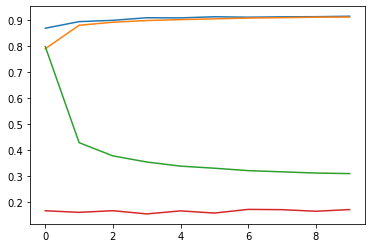

In [35]:
x = np.arange(0.0, epoch, 1)
plt.plot(x,val_accuracy,x,accuracy,x,loss,x,val_loss)

In [36]:
model_final  = kr.models.Sequential()
class CustomModelCheckpoint(kr.callbacks.Callback):
    minimun = 0.8
          
    def on_epoch_end(self, epoch, logs=None):
       
        # logs is a dictionary
        print(f"epoch: {epoch},history_callback.{logs['val_accuracy']}")
       
        if logs['val_accuracy'] > self.minimun: # your custom condition
    
          
            model.save('model1.h5', overwrite=True)
                     
            self.minimun = logs['val_accuracy']
            print(self.minimun)
            print("saved")

In [37]:
cbk = CustomModelCheckpoint()
history_callback = model.fit(x_train, y_train, validation_data=(x_test,y_test), epochs=epoch, batch_size=100, callbacks=[cbk])

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 1s 24us/step - loss: 0.3053 - accuracy: 0.9135 - val_loss: 0.1748 - val_accuracy: 0.9146
epoch: 0,history_callback.0.9146000146865845
0.9146000146865845
saved
Epoch 2/10
60000/60000 [==============================] - 1s 23us/step - loss: 0.3033 - accuracy: 0.9131 - val_loss: 0.1647 - val_accuracy: 0.9187
epoch: 1,history_callback.0.9186999797821045
0.9186999797821045
saved
Epoch 3/10
60000/60000 [==============================] - 1s 23us/step - loss: 0.3009 - accuracy: 0.9139 - val_loss: 0.1780 - val_accuracy: 0.9145
epoch: 2,history_callback.0.9144999980926514
Epoch 4/10
60000/60000 [==============================] - 1s 23us/step - loss: 0.2972 - accuracy: 0.9159 - val_loss: 0.1754 - val_accuracy: 0.9125
epoch: 3,history_callback.0.9125000238418579
Epoch 5/10
60000/60000 [==============================] - 1s 23us/step - loss: 0.2953 - accuracy: 0.9156 - val_loss: 0.1747 - val_ac

In [38]:
model = kr.models.Sequential()
model.add(kr.layers.Dense(units=512, input_dim=784, activation='relu'))
model.add(kr.layers.Dense(units=10, activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam', metrics=['accuracy'])


In [40]:
history_callback = model.fit(x_train, y_train, validation_data=(x_test,y_test), epochs=epoch, batch_size=100,
                             callbacks=[cbk])

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 2s 29us/step - loss: 0.5493 - accuracy: 0.8390 - val_loss: 0.2087 - val_accuracy: 0.8895
epoch: 0,history_callback.0.8895000219345093
Epoch 2/10
60000/60000 [==============================] - 2s 28us/step - loss: 0.3203 - accuracy: 0.9055 - val_loss: 0.1665 - val_accuracy: 0.9093
epoch: 1,history_callback.0.9093000292778015
Epoch 3/10
60000/60000 [==============================] - 2s 28us/step - loss: 0.2536 - accuracy: 0.9248 - val_loss: 0.1459 - val_accuracy: 0.9211
epoch: 2,history_callback.0.9211000204086304
0.9211000204086304
saved
Epoch 4/10
60000/60000 [==============================] - 2s 28us/step - loss: 0.2042 - accuracy: 0.9387 - val_loss: 0.0962 - val_accuracy: 0.9466
epoch: 3,history_callback.0.9466000199317932
0.9466000199317932
saved
Epoch 5/10
60000/60000 [==============================] - 2s 28us/step - loss: 0.1738 - accuracy: 0.9482 - val_loss: 0.0793 - val_ac

In [41]:
val_accuracy = np.array(history_callback.history['val_accuracy'])
val_loss =  np.array(history_callback.history['val_loss'])
accuracy =  np.array(history_callback.history['accuracy'])
loss =  np.array(history_callback.history['loss'])

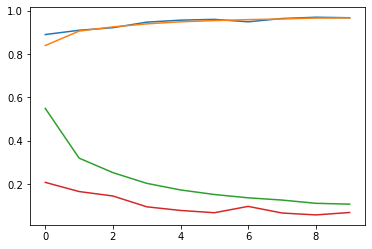

In [42]:
x = np.arange(0.0, epoch, 1)
plt.plot(x,val_accuracy,x,accuracy,x,loss,x,val_loss)

In [43]:
model = kr.models.Sequential()
model.add(kr.layers.Dense(units=512, input_dim=784, activation='relu'))
model.add(kr.layers.Dropout(0.01))
model.add(kr.layers.Dense(units=98, activation='relu'))
model.add(kr.layers.Dropout(0.1))
model.add(kr.layers.Dense(units=10, activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam', metrics=['accuracy'])

In [44]:
epoch = 10
history_callback = model.fit(x_train, y_train, validation_data=(x_test,y_test), epochs=epoch, batch_size=100
                             , callbacks=[cbk])

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 2s 36us/step - loss: 0.5926 - accuracy: 0.8178 - val_loss: 0.1656 - val_accuracy: 0.9029
epoch: 0,history_callback.0.902899980545044
Epoch 2/10
60000/60000 [==============================] - 2s 35us/step - loss: 0.3114 - accuracy: 0.9050 - val_loss: 0.1338 - val_accuracy: 0.9227
epoch: 1,history_callback.0.9226999878883362
Epoch 3/10
60000/60000 [==============================] - 2s 34us/step - loss: 0.2394 - accuracy: 0.9267 - val_loss: 0.1123 - val_accuracy: 0.9424
epoch: 2,history_callback.0.9423999786376953
Epoch 4/10
60000/60000 [==============================] - 2s 34us/step - loss: 0.2047 - accuracy: 0.9371 - val_loss: 0.1118 - val_accuracy: 0.9420
epoch: 3,history_callback.0.9419999718666077
Epoch 5/10
60000/60000 [==============================] - 2s 34us/step - loss: 0.1768 - accuracy: 0.9463 - val_loss: 0.0893 - val_accuracy: 0.9544
epoch: 4,history_callback.0.95440000

In [45]:
val_accuracy = np.array(history_callback.history['val_accuracy'])
val_loss =  np.array(history_callback.history['val_loss'])
accuracy =  np.array(history_callback.history['accuracy'])
loss =  np.array(history_callback.history['loss'])

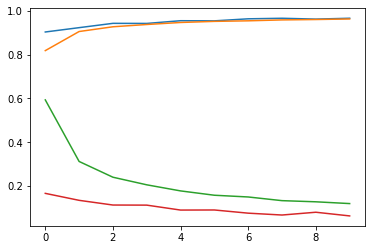

In [46]:

x = np.arange(0.0, epoch, 1)
plt.plot(x,val_accuracy,x,accuracy,x,loss,x,val_loss)

In [48]:
score = kr.models.load_model('./model1.h5').evaluate(x_test, y_test, verbose=0)
score

[0.05882273079205245, 0.9692000150680542]

In [50]:
x_train = x_train.reshape(train_img_total,col,row,1)
x_test = x_test.reshape(test_img_total,col,row,1)

In [52]:
x_train[0]

array([[[1.        ],
        [1.        ],
        [1.        ],
        [1.        ],
        [1.        ],
        [1.        ],
        [1.        ],
        [1.        ],
        [1.        ],
        [1.        ],
        [1.        ],
        [1.        ],
        [1.        ],
        [1.        ],
        [1.        ],
        [1.        ],
        [1.        ],
        [1.        ],
        [1.        ],
        [1.        ],
        [1.        ],
        [1.        ],
        [1.        ],
        [1.        ],
        [1.        ],
        [1.        ],
        [1.        ],
        [1.        ]],

       [[1.        ],
        [1.        ],
        [1.        ],
        [1.        ],
        [1.        ],
        [1.        ],
        [1.        ],
        [1.        ],
        [1.        ],
        [1.        ],
        [1.        ],
        [1.        ],
        [1.        ],
        [1.        ],
        [1.        ],
        [1.        ],
        [1.        ],
        

In [53]:
model = kr.models.Sequential()
model.add(kr.layers.Conv2D(64,kernel_size=(7, 7),activation='relu',input_shape=(28,28,1)))
model.add(kr.layers.Conv2D(64,kernel_size=(7, 7),activation='relu',input_shape=(28,28,1)))
model.add(kr.layers.MaxPooling2D(pool_size=(2, 2),))
model.add(kr.layers.Conv2D(128,kernel_size=(5, 5),activation='relu'))
model.add(kr.layers.Conv2D(256,kernel_size=(3, 3),activation='relu'))
model.add(kr.layers.MaxPooling2D(pool_size=(2, 2),))
model.add(kr.layers.Flatten())
model.add(kr.layers.Dropout(0.25))
model.add(kr.layers.Dense(units=98, activation='relu'))
model.add(kr.layers.Dropout(0.1))
model.add(kr.layers.Dense(units=10, activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam', metrics=['accuracy'])

In [54]:
epoch = 10
history_callback = model.fit(x_train, y_train, validation_data=(x_test,y_test), epochs=epoch, batch_size=100
                             , callbacks=[cbk])

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 8s 133us/step - loss: 0.2215 - accuracy: 0.9296 - val_loss: 0.0321 - val_accuracy: 0.9855
epoch: 0,history_callback.0.9854999780654907
0.9854999780654907
saved
Epoch 2/10
60000/60000 [==============================] - 5s 90us/step - loss: 0.0592 - accuracy: 0.9828 - val_loss: 0.0429 - val_accuracy: 0.9844
epoch: 1,history_callback.0.9843999743461609
Epoch 3/10
60000/60000 [==============================] - 5s 90us/step - loss: 0.0439 - accuracy: 0.9872 - val_loss: 0.0250 - val_accuracy: 0.9873
epoch: 2,history_callback.0.9872999787330627
0.9872999787330627
saved
Epoch 4/10
60000/60000 [==============================] - 5s 90us/step - loss: 0.0355 - accuracy: 0.9900 - val_loss: 0.0194 - val_accuracy: 0.9905
epoch: 3,history_callback.0.9904999732971191
0.9904999732971191
saved
Epoch 5/10
60000/60000 [==============================] - 5s 91us/step - loss: 0.0279 - accuracy: 0.9926 -

In [55]:
score = kr.models.load_model('./model1.h5').evaluate(x_test, y_test, verbose=0)
score

[0.02594072594717145, 0.9922999739646912]

In [56]:
model = kr.models.Sequential()
model.add(kr.layers.Conv2D(64,kernel_size=(7, 7),activation='relu',input_shape=(28,28,1)))
kr.layers.BatchNormalization(axis=-1)
model.add(kr.layers.Conv2D(64,kernel_size=(7, 7),activation='relu',input_shape=(28,28,1)))
kr.layers.BatchNormalization(axis=-1)
model.add(kr.layers.MaxPooling2D(pool_size=(2, 2),))
model.add(kr.layers.Conv2D(128,kernel_size=(5, 5),activation='relu'))
kr.layers.BatchNormalization(axis=-1)
model.add(kr.layers.Conv2D(256,kernel_size=(3, 3),activation='relu'))
model.add(kr.layers.MaxPooling2D(pool_size=(2, 2),))
model.add(kr.layers.Flatten())
model.add(kr.layers.Dropout(0.25))
model.add(kr.layers.Dense(units=98, activation='relu'))
model.add(kr.layers.Dropout(0.1))
model.add(kr.layers.Dense(units=10, activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam', metrics=['accuracy'])

In [57]:
epoch = 10
history_callback = model.fit(x_train, y_train, validation_data=(x_test,y_test), epochs=epoch, batch_size=100
                             , callbacks=[cbk])

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 6s 94us/step - loss: 0.2180 - accuracy: 0.9316 - val_loss: 0.0312 - val_accuracy: 0.9838
epoch: 0,history_callback.0.9837999939918518
Epoch 2/10
60000/60000 [==============================] - 5s 90us/step - loss: 0.0618 - accuracy: 0.9826 - val_loss: 0.0265 - val_accuracy: 0.9877
epoch: 1,history_callback.0.9876999855041504
Epoch 3/10
60000/60000 [==============================] - 5s 90us/step - loss: 0.0448 - accuracy: 0.9867 - val_loss: 0.0336 - val_accuracy: 0.9870
epoch: 2,history_callback.0.9869999885559082
Epoch 4/10
60000/60000 [==============================] - 5s 90us/step - loss: 0.0366 - accuracy: 0.9889 - val_loss: 0.0195 - val_accuracy: 0.9924
epoch: 3,history_callback.0.9923999905586243
0.9923999905586243
saved
Epoch 5/10
60000/60000 [==============================] - 5s 90us/step - loss: 0.0305 - accuracy: 0.9908 - val_loss: 0.0461 - val_accuracy: 0.9851
epoch: 4,h

In [60]:
score = kr.models.load_model('./model1.h5').evaluate(x_test, y_test, verbose=0)
score

[0.019230645605176688, 0.9933000206947327]

In [70]:
model = kr.models.Sequential()
model.add(kr.layers.Conv2D(32,kernel_size=(3, 3),activation='relu',input_shape=(28,28,1)))
model.add(kr.layers.Conv2D(64,kernel_size=(3, 3),activation='relu'))
model.add(kr.layers.Conv2D(128,kernel_size=(3, 3),activation='relu'))
model.add(kr.layers.Conv2D(256,kernel_size=(5, 3),activation='relu'))
model.add(Dropout(0.05))
model.add(kr.layers.Conv2D(128, (3, 3), activation='relu'))
model.add(kr.layers.MaxPooling2D(pool_size=(2, 2),))
model.add(kr.layers.Dropout(0.25))
model.add(kr.layers.Flatten())
model.add(kr.layers.Dense(units=10, activation='softmax'))
 
model.compile(loss=kr.losses.categorical_crossentropy,optimizer='adadelta',metrics=['accuracy'])
model.summary()
 



Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_19 (Conv2D)           (None, 22, 22, 64)        3200      
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 16, 16, 128)       401536    
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 10, 10, 256)       1605888   
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 1, 1, 256)         0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 1, 1, 256)         0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 256)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 10)              

In [71]:
from keras.preprocessing.image import ImageDataGenerator

In [72]:
gen = ImageDataGenerator(rotation_range=8, width_shift_range=0.08, shear_range=0.3,
                         height_shift_range=0.08, zoom_range=0.08)
test_gen = ImageDataGenerator()

In [73]:
train_generator = gen.flow(x_train, y_train, batch_size=64)
test_generator = test_gen.flow(x_test, y_test, batch_size=64)

In [74]:
epoch =60
history_callback= model.fit_generator(train_generator, steps_per_epoch=60000//64, epochs=epoch, 
                    validation_data=test_generator, validation_steps=10000//64, callbacks=[cbk])

Epoch 1/60
937/937 [==============================] - 12s 13ms/step - loss: 0.3090 - accuracy: 0.9024 - val_loss: 0.0084 - val_accuracy: 0.9865
epoch: 0,history_callback.0.9864783883094788
Epoch 2/60
937/937 [==============================] - 12s 13ms/step - loss: 0.0849 - accuracy: 0.9744 - val_loss: 0.0000e+00 - val_accuracy: 0.9935
epoch: 1,history_callback.0.9934581518173218
Epoch 3/60
937/937 [==============================] - 12s 13ms/step - loss: 0.0634 - accuracy: 0.9812 - val_loss: 0.0000e+00 - val_accuracy: 0.9923
epoch: 2,history_callback.0.992250382900238
Epoch 4/60
937/937 [==============================] - 12s 13ms/step - loss: 0.0521 - accuracy: 0.9847 - val_loss: 0.0000e+00 - val_accuracy: 0.9933
epoch: 3,history_callback.0.9932568669319153
Epoch 5/60
937/937 [==============================] - 12s 13ms/step - loss: 0.0444 - accuracy: 0.9873 - val_loss: 0.0000e+00 - val_accuracy: 0.9918
epoch: 4,history_callback.0.991847813129425
Epoch 6/60
937/937 [=====================

937/937 [==============================] - 12s 13ms/step - loss: 0.0126 - accuracy: 0.9965 - val_loss: 0.0000e+00 - val_accuracy: 0.9952
epoch: 42,history_callback.0.9951691031455994
Epoch 44/60
937/937 [==============================] - 12s 13ms/step - loss: 0.0121 - accuracy: 0.9966 - val_loss: 0.0000e+00 - val_accuracy: 0.9935
epoch: 43,history_callback.0.9934581518173218
Epoch 45/60
937/937 [==============================] - 12s 13ms/step - loss: 0.0133 - accuracy: 0.9968 - val_loss: 0.1511 - val_accuracy: 0.9943
epoch: 44,history_callback.0.9942632913589478
Epoch 46/60
937/937 [==============================] - 13s 13ms/step - loss: 0.0128 - accuracy: 0.9969 - val_loss: 0.0223 - val_accuracy: 0.9932
epoch: 45,history_callback.0.9931561946868896
Epoch 47/60
937/937 [==============================] - 12s 13ms/step - loss: 0.0122 - accuracy: 0.9968 - val_loss: 0.0000e+00 - val_accuracy: 0.9926
epoch: 46,history_callback.0.9925523400306702
Epoch 48/60
937/937 [========================

In [75]:
score = kr.models.load_model('./model1.h5').evaluate(x_test, y_test, verbose=0)
score

[0.02317712261080742, 0.9957000017166138]